# Collecting Data and creating ESRI shapefile

The city of Delhi has been chosen for this challenge.

This file has been divided into 3 sections :<BR><BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     1) Retrieving the co-ordinates polygon of Delhi from OpenStreetMap and creating boundaries.<BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     2) Retrieving the POIs of all 'amenities' in the selected area.<BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    3) Exporting 1 and 2 to ESRI shapefiles.

## 1) Coordinate Polygon of New Delhi

Using OpenStreetMap, marked the boundaries of New Delhi by using relation:<br>
https://www.openstreetmap.org/relation/1942586<BR><BR>
Getting the polygon coordinates in WKT format by using the tool :<BR>
http://polygons.openstreetmap.fr<BR><BR>
Obtained the Polygon of Delhi : http://polygons.openstreetmap.fr/get_wkt.py?id=1942586&params=0<BR><BR>
Creating the Geo DataFrame for Delhi using GeoPandas :

In [1]:
coords = "MULTIPOLYGON(((76.8388947 28.5726624,76.8401245 28.5714724,76.8401674 28.5696275,76.8401913 28.5695522,76.8423776 28.5626414,76.8438303 28.5618782,76.8437916 28.5565426,76.8455044 28.554104,76.8458602 28.5500119,76.8525086 28.5480013,76.8609749 28.5454749,76.8644468 28.5436729,76.8663673 28.5415542,76.8676032 28.5361423,76.8713283 28.5344136,76.8724565 28.5337105,76.8735857 28.5329734,76.8736018 28.5329284,76.873722 28.5325924,76.8742856 28.5310168,76.8742911 28.5287422,76.8764266 28.5260698,76.8768675 28.5249498,76.8850534 28.5210524,76.8871383 28.5203063,76.8870543 28.5196944,76.8855312 28.5169805,76.8835941 28.512508,76.881622 28.5099062,76.8805218 28.5055814,76.8815571 28.5046508,76.8818812 28.5047474,76.8828629 28.5039865,76.8843317 28.5030927,76.8858948 28.5025812,76.8854384 28.5013758,76.8919496 28.5008313,76.8927029 28.5012843,76.8969407 28.5067536,76.9023501 28.5067403,76.9069036 28.5137629,76.9099794 28.5120699,76.9101567 28.512058,76.9119085 28.5121736,76.9159189 28.5107953,76.9184236 28.5092347,76.9209019 28.5069098,76.9242611 28.5078479,76.9275524 28.5104953,76.9349625 28.511019,76.9357706 28.510516,76.9397376 28.5077838,76.9433252 28.5053126,76.9454202 28.5053976,76.9527581 28.5053165,76.9542983 28.5057989,76.9620491 28.5115276,76.9706299 28.515795,76.9760101 28.5189384,76.9783614 28.521248,76.9802327 28.5198029,76.9812139 28.5191174,76.9832794 28.5170355,76.983382 28.5169891,76.9909463 28.5135677,76.9945276 28.5176083,76.9953859 28.5171445,76.995969 28.5180315,76.9968081 28.5197124,76.9990215 28.5184832,76.9999923 28.5179712,77.0027226 28.517293,77.0059191 28.5158558,77.0067265 28.515635,77.0070407 28.515549,77.0085304 28.5151415,77.0100507 28.5147255,77.010493 28.5151221,77.0105264 28.5151521,77.0108262 28.5154209,77.0116413 28.5161518,77.0125538 28.5169701,77.0128839 28.5172777,77.0144723 28.518757,77.0169637 28.5210774,77.0146291 28.5243485,77.0109604 28.5254513,77.0105771 28.5257745,77.0096 28.5266409,77.0084756 28.5270283,77.0050118 28.528947,77.001651 28.5308083,77.0013295 28.5309863,77.0016644 28.5334918,77.0043849 28.537795,77.0054601 28.5394957,77.0076538 28.5397729,77.0086334 28.5403299,77.0096858 28.539869,77.0101933 28.5402687,77.0122092 28.5400104,77.0128497 28.5402697,77.013457 28.5405156,77.0140943 28.5399982,77.0162808 28.5392112,77.0174235 28.537688,77.0197006 28.536218,77.0217024 28.5349596,77.0219253 28.5347748,77.0232546 28.5335616,77.0245903 28.5327132,77.0297824 28.5317014,77.0298668 28.5316849,77.0321198 28.5310788,77.0340498 28.5300715,77.0356102 28.5292571,77.0356349 28.5292442,77.0417144 28.526071,77.0424046 28.5256984,77.0431514 28.525237,77.0433583 28.5251546,77.0433705 28.5241644,77.0446105 28.5230837,77.0485081 28.5209199,77.0462065 28.5166427,77.0491721 28.5160453,77.0543531 28.5143512,77.0575428 28.5128211,77.0577011 28.5127924,77.0606606 28.5122555,77.0612165 28.512224,77.0633996 28.5126665,77.0645251 28.5126891,77.0653494 28.5125045,77.0671624 28.5119289,77.067616 28.5129745,77.068865 28.5145822,77.0709886 28.5170499,77.0713662 28.5175938,77.0720941 28.5193619,77.0722213 28.5201457,77.0723001 28.5202588,77.073365 28.5195071,77.0744667 28.5189307,77.0747744 28.5188088,77.0750139 28.5187138,77.0774386 28.5184405,77.0792318 28.5182128,77.0792947 28.5182048,77.080411 28.5180224,77.0827494 28.5170898,77.0830605 28.5169698,77.0840905 28.5166587,77.0846261 28.5164992,77.0859573 28.5161025,77.0925942 28.5142311,77.0932384 28.5140471,77.0939181 28.5138682,77.0986588 28.5114068,77.0957527 28.5070803,77.0976517 28.5048552,77.1000335 28.5038653,77.102308 28.5031016,77.1037666 28.5024887,77.1053974 28.5013384,77.1101396 28.4993961,77.1124784 28.4984532,77.1195069 28.495139,77.1176758 28.4869845,77.1167211 28.4850054,77.1150614 28.4815648,77.1141825 28.4735235,77.1124724 28.473184,77.1164549 28.4672234,77.1200235 28.4627232,77.1234764 28.4597104,77.1238974 28.4550376,77.1242592 28.45102,77.1253919 28.4502107,77.1277291 28.4428335,77.1306896 28.4399226,77.1322839 28.4389245,77.1348481 28.4391509,77.1379959 28.4382283,77.1405986 28.438483,77.1434076 28.4375547,77.1470361 28.4367489,77.1493 28.4365575,77.1503171 28.4357065,77.1510832 28.4353556,77.1517387 28.4347895,77.1520402 28.4341045,77.1563478 28.4314326,77.1598529 28.4302505,77.1615457 28.4293069,77.1627023 28.4269387,77.1623375 28.4244365,77.16367 28.4216926,77.1637644 28.4197337,77.1641326 28.4148374,77.1682289 28.4132313,77.1703554 28.4110496,77.1724045 28.4054516,77.1742306 28.404625,77.1759743 28.40691,77.1784076 28.4103978,77.1834865 28.4098184,77.1855702 28.409441,77.2215052 28.4133589,77.2311715 28.4220721,77.2421835 28.4281296,77.2407265 28.4290028,77.2436004 28.4328512,77.2455138 28.4354133,77.2458682 28.4482566,77.2460717 28.449847,77.2454943 28.4506898,77.2423723 28.4552463,77.2401824 28.4563597,77.2333301 28.4550577,77.2316307 28.4562877,77.234905 28.4700734,77.2435288 28.4793826,77.2627036 28.4880876,77.2702482 28.4883894,77.2717082 28.4902523,77.2756317 28.4938073,77.2768176 28.4937208,77.2773938 28.4940066,77.2779254 28.4941373,77.2784303 28.4941521,77.2787834 28.4943318,77.2789567 28.4943171,77.2790858 28.4942692,77.2793083 28.4942866,77.2796978 28.4944385,77.2798585 28.4944862,77.280213 28.4945712,77.2821624 28.4949482,77.2909248 28.4973737,77.2968557 28.4950202,77.3006511 28.494698,77.3006377 28.4902724,77.3011543 28.4902727,77.3014224 28.4907459,77.3058035 28.4897209,77.3093698 28.4884611,77.3148072 28.4840214,77.3171424 28.4857358,77.3200428 28.4878651,77.326626 28.4905092,77.3304713 28.4958952,77.346601 28.5185395,77.3369151 28.5237449,77.3161983 28.5429099,77.3040962 28.5516557,77.3010762 28.5586835,77.2939098 28.5742182,77.2928862 28.5761741,77.2957336 28.5825581,77.3001721 28.5868738,77.3015403 28.5868762,77.3028579 28.5866639,77.3044218 28.5857973,77.3088576 28.5893281,77.3101586 28.5907417,77.3111383 28.5919457,77.311132 28.5926252,77.3113246 28.5931228,77.3119769 28.5938046,77.3126577 28.5951812,77.3134893 28.5958148,77.3131815 28.5963397,77.3133819 28.5965247,77.3141857 28.5967546,77.3149279 28.5969669,77.31712 28.5968503,77.3194944 28.5974307,77.3201252 28.5975835,77.3212322 28.5976895,77.3218903 28.5976426,77.3225958 28.5975281,77.3258951 28.5981814,77.3263688 28.5985095,77.3267148 28.5987491,77.3271158 28.5986704,77.3281611 28.5993706,77.3297187 28.600414,77.3316768 28.6011371,77.3336187 28.6014856,77.3347131 28.6019423,77.3356035 28.6016928,77.3367462 28.6018012,77.337642 28.6024417,77.3384232 28.6032323,77.338699 28.6029897,77.3395777 28.6041325,77.3402921 28.6046086,77.3407914 28.6052157,77.3412221 28.6051404,77.3420594 28.6101623,77.3417626 28.6136069,77.3416914 28.6136261,77.3416608 28.613724,77.3415286 28.6137665,77.3417203 28.6157252,77.3418542 28.6170951,77.3420079 28.6187598,77.3419371 28.6193425,77.3416802 28.6201852,77.341433 28.6207682,77.3410432 28.6212264,77.3403163 28.6218056,77.3401656 28.6220337,77.3404228 28.6236487,77.3395998 28.624098,77.3386035 28.6249339,77.3365109 28.6263181,77.3344299 28.6277274,77.3337696 28.6288811,77.3322902 28.6299179,77.3312417 28.6313165,77.3296659 28.631841,77.3288035 28.632283,77.3270954 28.6329216,77.3260092 28.6331684,77.3243082 28.6349278,77.3220117 28.6367878,77.3160836 28.6412336,77.3164413 28.6421609,77.316583 28.6423809,77.3173678 28.6434285,77.3172107 28.6435806,77.3173256 28.6441466,77.3174718 28.6449794,77.3183162 28.6470773,77.3187833 28.6481509,77.3193994 28.6494967,77.3203609 28.6520115,77.3206128 28.6539073,77.3200812 28.6545721,77.3201288 28.6625839,77.322538 28.6696714,77.3244481 28.6712418,77.3250492 28.6738756,77.3252446 28.6778564,77.3260836 28.6782546,77.3300672 28.6786179,77.3300715 28.6786225,77.3317589 28.6803914,77.3329522 28.6816421,77.3321928 28.6828858,77.3307278 28.6883913,77.3273146 28.6936704,77.3236878 28.6987054,77.3256806 28.7020986,77.3258776 28.702434,77.3256666 28.7056107,77.325427 28.7087935,77.328209 28.7114762,77.3311067 28.7131972,77.3281118 28.7130927,77.3271328 28.7133516,77.3262755 28.7131088,77.3245282 28.7130415,77.3235182 28.7121669,77.3225001 28.7114612,77.3213853 28.7126223,77.3206526 28.7129281,77.3201378 28.7131049,77.3187224 28.7135908,77.3172354 28.7141043,77.315816 28.7128444,77.3135115 28.713441,77.3044242 28.7118347,77.2990287 28.7098032,77.2959312 28.7050915,77.292275 28.7058931,77.2912591 28.7063661,77.2892267 28.7083784,77.2873191 28.7123334,77.2863386 28.7144478,77.2893996 28.717168,77.2897332 28.7209279,77.2908705 28.7227353,77.2866348 28.7249004,77.286462 28.7249887,77.2843538 28.7279871,77.2800429 28.732486,77.2756655 28.7355623,77.2735863 28.7359584,77.260922 28.7355868,77.2558344 28.7385417,77.2553291 28.7410543,77.2557368 28.7411888,77.2558891 28.7430401,77.2570929 28.7450221,77.2577545 28.7467624,77.257846 28.7470032,77.2589801 28.7476974,77.2594779 28.748734,77.2596506 28.7497903,77.2596249 28.7505418,77.2589039 28.7512558,77.2586711 28.7526338,77.2553151 28.7541227,77.2548484 28.7558487,77.2537036 28.7556154,77.2521898 28.7554367,77.2505923 28.7552213,77.2484487 28.7555044,77.246805 28.7559465,77.2454961 28.7565635,77.2441496 28.7573122,77.2425564 28.7578718,77.2403226 28.7582246,77.2381095 28.759103,77.2386778 28.7619672,77.23559 28.7712591,77.2334828 28.7711838,77.2328799 28.774953,77.2210394 28.7791602,77.2280335 28.7845745,77.2244286 28.7863875,77.2137953 28.7843866,77.2072765 28.786696,77.2033005 28.791877,77.2018972 28.7938703,77.2000239 28.7969636,77.1992836 28.801029,77.1992427 28.8045262,77.2006006 28.808786,77.2021247 28.8135671,77.2187201 28.8108428,77.218424 28.8134714,77.2193638 28.8174872,77.2207712 28.8187176,77.2231208 28.8196257,77.2232517 28.8205845,77.223211 28.8214812,77.2236691 28.8223178,77.2231165 28.8231092,77.221516 28.8252684,77.2209281 28.8266971,77.2209195 28.8285844,77.2214281 28.8304417,77.222132 28.8333328,77.2207844 28.8341261,77.2150039 28.841516,77.2150576 28.8460011,77.2161386 28.8477203,77.2165678 28.8493348,77.2154883 28.8527816,77.2141885 28.8561383,77.2112891 28.8564633,77.2090846 28.8572986,77.2063734 28.8570666,77.2048423 28.8569012,77.2040495 28.8569304,77.2025002 28.857652,77.1992076 28.8591432,77.1970736 28.8594298,77.1961842 28.8593537,77.1949868 28.8592513,77.1919948 28.8586565,77.1904164 28.8583427,77.1840627 28.8579385,77.1821541 28.8577864,77.1804836 28.8578371,77.1782295 28.8585973,77.1751943 28.8585344,77.1731547 28.8574959,77.1732567 28.8564511,77.1731504 28.8556919,77.1727653 28.8548499,77.1720604 28.8500537,77.1699683 28.8506175,77.1689361 28.8504785,77.1670822 28.8488339,77.166299 28.8493245,77.1626405 28.845073,77.1586708 28.8403365,77.1570937 28.8392144,77.1567139 28.8385114,77.1570465 28.8375527,77.1579949 28.8368479,77.1529995 28.8376881,77.1490556 28.8379813,77.1452791 28.8380509,77.1440925 28.8387482,77.1422364 28.8394286,77.142245 28.8414981,77.1414253 28.8424623,77.141554 28.8433382,77.1419424 28.8472401,77.1452533 28.8520703,77.1455151 28.8537016,77.1445323 28.8546789,77.1437062 28.8546855,77.1429048 28.8553019,77.1423308 28.8557802,77.1418705 28.8565038,77.1409843 28.8591752,77.1411667 28.8603591,77.1409371 28.860625,77.140332 28.8606655,77.1402226 28.8617488,77.1340943 28.8628106,77.1337391 28.8631271,77.1328454 28.8624911,77.1305387 28.8621312,77.1247002 28.8595153,77.1249212 28.8580185,77.1243 28.8575487,77.1228816 28.8579302,77.1218601 28.8579549,77.1193946 28.8607625,77.117045 28.8623862,77.1153928 28.8642917,77.109994 28.8698953,77.1079534 28.8696811,77.1032198 28.8705455,77.0971387 28.8706939,77.0944448 28.871468,77.0932806 28.8718026,77.087824 28.8755418,77.0882982 28.8766842,77.0876201 28.8810133,77.0867446 28.8817047,77.0825882 28.8834463,77.082142 28.8814379,77.0805005 28.8792847,77.0774383 28.8770223,77.0793396 28.8716635,77.0787302 28.8715686,77.0781337 28.8709739,77.0777796 28.8707193,77.0776455 28.8703435,77.0769052 28.869744,77.0754536 28.8689201,77.0746747 28.8671913,77.0734055 28.8677071,77.0726362 28.8682915,77.0720966 28.8687688,77.0712844 28.8686946,77.0704218 28.867817,77.0699358 28.8678029,77.0695109 28.8675098,77.0692888 28.8670297,77.0638364 28.8692094,77.0612207 28.8707183,77.0583014 28.8680162,77.0559078 28.8644571,77.0543842 28.8624218,77.0537095 28.861861,77.053684 28.8618282,77.0531494 28.8611412,77.0529284 28.8608791,77.0526613 28.8600193,77.0520723 28.859106,77.0518748 28.8580451,77.051803 28.8567982,77.051127 28.8549442,77.0511324 28.8545524,77.0499092 28.8528035,77.0481122 28.8503237,77.0471424 28.849384,77.0466252 28.8482554,77.0459944 28.8476981,77.0455577 28.8470421,77.0454847 28.8465074,77.0452337 28.845906,77.0457734 28.8456109,77.0454504 28.844439,77.0454912 28.8422042,77.0449277 28.8401822,77.0446331 28.8401813,77.0427583 28.8386475,77.0420572 28.837733,77.0419772 28.8370911,77.0427985 28.8349986,77.0422192 28.8335836,77.0413356 28.8330328,77.0401716 28.8318035,77.0386191 28.8327631,77.0367909 28.8333091,77.0352245 28.8341607,77.0336924 28.8345366,77.0325959 28.8351297,77.0308664 28.8357442,77.0282014 28.8366052,77.0271328 28.8368712,77.0260181 28.8377894,77.0233788 28.8391428,77.0201634 28.8393175,77.0180144 28.8399567,77.0148751 28.8405553,77.009427 28.8408081,77.0057341 28.8402038,76.999751 28.8384055,76.9991552 28.8382265,76.9943616 28.839624,76.9930484 28.8387659,76.9904863 28.8377903,76.9891432 28.8356419,76.9871245 28.8343821,76.9865837 28.8297485,76.9849808 28.8268272,76.9803352 28.8214863,76.9771446 28.8226369,76.9759558 28.8227553,76.9747778 28.825047,76.9733358 28.8266693,76.9723016 28.8270697,76.9713489 28.8276374,76.9702588 28.8274908,76.9681473 28.8278385,76.9667848 28.8275134,76.9658256 28.8276881,76.9656776 28.8258384,76.9648601 28.8253459,76.964491 28.8246202,76.9649159 28.8241333,76.9637651 28.8227318,76.963999 28.8223929,76.9640135 28.8220508,76.9648279 28.8211818,76.9647473 28.8207592,76.9649227 28.8201393,76.9647398 28.8198474,76.964515 28.8196411,76.9626064 28.8162199,76.9622389 28.8158176,76.9617013 28.8148996,76.9611457 28.8149981,76.9605964 28.815303,76.9590064 28.8153274,76.9571138 28.8163972,76.9512237 28.8182528,76.9492131 28.8160776,76.9482904 28.8141956,76.9474472 28.8136015,76.9471918 28.8124208,76.9454022 28.8097736,76.9467562 28.8080626,76.9458057 28.8047158,76.9434539 28.8015155,76.9422415 28.798302,76.9442113 28.7982381,76.9466768 28.7975348,76.9479858 28.7959853,76.9497324 28.7947217,76.9540282 28.7902781,76.9514876 28.7871921,76.9500607 28.7832071,76.9483076 28.7797729,76.9502173 28.7753325,76.955262 28.7694153,76.9556504 28.7676623,76.95133 28.7633688,76.9509481 28.7630068,76.9504556 28.7629381,76.9497883 28.7623437,76.9474623 28.7594422,76.9467445 28.7587499,76.9457177 28.7572508,76.9444259 28.7538892,76.9505414 28.7503544,76.9534415 28.7478051,76.9559208 28.7458845,76.9565185 28.7450641,76.9587554 28.7428367,76.9579937 28.7417378,76.9567234 28.7392205,76.9562616 28.7385321,76.9560292 28.7381857,76.9563447 28.7374293,76.9584378 28.7357004,76.9585959 28.7353843,76.9597939 28.7329891,76.9598572 28.7319701,76.9596501 28.7309719,76.9598369 28.7299219,76.9597831 28.7295353,76.9558714 28.7234529,76.951228 28.7179393,76.9481166 28.7124612,76.95167 28.7099695,76.9613796 28.7037945,76.9664768 28.7000852,76.9680249 28.6991995,76.9664081 28.6978491,76.9644265 28.6951971,76.9634759 28.6934306,76.9632216 28.6920575,76.9613602 28.6895521,76.9595824 28.6877225,76.9588829 28.6864057,76.9574302 28.6839624,76.9567564 28.6807923,76.9559904 28.6760737,76.955616 28.6715733,76.9545012 28.6695739,76.9511695 28.6705661,76.9490488 28.6713417,76.9451328 28.6716072,76.9445985 28.671128,76.9439172 28.670824,76.9373684 28.6702357,76.9354545 28.6677178,76.9348301 28.6672824,76.9332154 28.6651803,76.933181 28.6643872,76.9325722 28.6622379,76.9322326 28.6613591,76.9316844 28.660622,76.9311887 28.6592819,76.9245164 28.6496429,76.9292174 28.6457753,76.9307597 28.6427768,76.9326844 28.6412477,76.9352872 28.6389012,76.9367807 28.6374868,76.9398534 28.6350517,76.9443942 28.6330563,76.9435575 28.6308134,76.943248 28.6299836,76.9423962 28.6272319,76.939244 28.6231673,76.9372056 28.6210841,76.9352663 28.6184416,76.9335518 28.6190485,76.9277947 28.6232448,76.9245691 28.6271453,76.9210608 28.6307577,76.9191339 28.631479,76.9142339 28.6321799,76.9087248 28.6270511,76.9065341 28.6236245,76.902185 28.6261962,76.8929384 28.631366,76.8893571 28.6318048,76.8843939 28.6236551,76.8770185 28.6097322,76.8741947 28.6050495,76.8718455 28.6030003,76.8704336 28.5974389,76.8681209 28.5912896,76.8666635 28.5887345,76.8653824 28.5873666,76.8646101 28.5855295,76.8571054 28.5852591,76.8462014 28.5845749,76.8460105 28.5845629,76.8394661 28.5825448,76.8394359 28.5825354,76.8388351 28.5732306,76.8388947 28.5726624)))"

import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely import wkt

indx = [["Delhi",coords]]
indf = pd.DataFrame(indx, columns = ['City', 'geometry'])   # Dataframe for New Delhi

indf['geometry'] = indf['geometry'].apply(wkt.loads)
gdf = geopandas.GeoDataFrame(indf, geometry='geometry')     # GeoDataFrame for New Delhi

Obtaining the graph of Delhi :

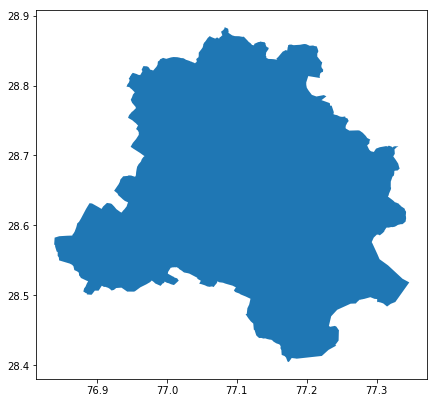

In [2]:
gdf.plot(figsize=(7, 7))
plt.show()

## 2) POIs in Delhi

Queries have been tested in : https://overpass-turbo.eu/<BR>
Using the queries, all "nodes" in the defined area of "Delhi" having been tagged as "amenities" in the OSM have been selected to represent POIs.<BR><BR>
GeoDataFrame for POIs :

In [3]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-2"="IN-DL"][admin_level=4];
node['amenity'](area);
out;
out center;
"""
response = requests.get(overpass_url,
                        params={'data': overpass_query})
data = response.json()

# Collect coords into list
coords = []
tags = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
        try:
            name = element['tags']['name']
        except:
            name = "-"
        try:
            cat = element['tags']['amenity']
        except:
            cat = "-"
        tags.append([name,cat])
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
        try:
            name = element['tags']['name']
        except:
            name = "-"
        try:
            cat = element['tags']['amenity']
        except:
            cat = "-"
        tags.append([name,cat])

dframe=[]
for val in range(len(tags)):
    dframe.append([tags[val][0],tags[val][1],coords[val][0],coords[val][1]])

# DataFrame for POIs with 4 columns : Company Name, Category, Longitude and Latitude
df = pd.DataFrame(dframe, columns = ['Company', 'Category', 'Longitude', 'Latitude'])

# GeoDataFrame for POIs
df['geometry'] = df.apply(lambda x: Point((float(x.Longitude), float(x.Latitude))), axis=1)

df = geopandas.GeoDataFrame(df, geometry='geometry')

Plotting the POIs in the Delhi Polygon :

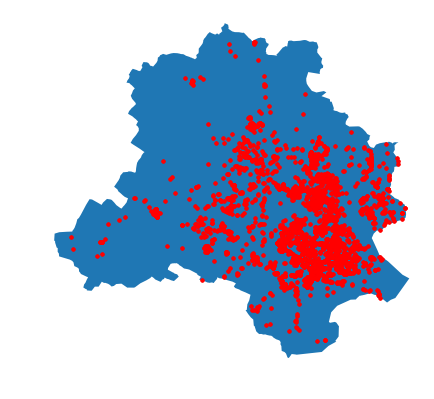

In [4]:
ax = gdf.plot(figsize=(7, 7))
df.plot(ax=ax, color="red", markersize=10)
ax.set_axis_off()
plt.show()

The POIs GeoDataFrame table head :

In [5]:
print(df.head())

                         Company          Category  Longitude   Latitude  \
0                Cafe Coffee Day              cafe  77.151895  28.533492   
1          ICICI, SBI, Citibank,              bank  77.152001  28.533647   
2  Heritage International School            school  77.166546  28.508450   
3             Deep Public School            school  77.163482  28.511716   
4                         Temple  place_of_worship  77.175677  28.505700   

                               geometry  
0          POINT (77.1518947 28.533492)  
1          POINT (77.152001 28.5336472)  
2          POINT (77.166546 28.5084497)  
3  POINT (77.16348189999999 28.5117155)  
4         POINT (77.1756767 28.5057002)  


## 3) Exporting Delhi polygon and POIs to ESRI shapefiles

The Delhi polygon was used for visual representation and is not used for further steps of clustering

In [6]:
#Added comments as files already exist.

#df.to_file('Data (ESRI Shapefiles)/Delhi_POI.shp', driver='ESRI Shapefile')
#gdf.to_file('Data (ESRI Shapefiles)/Delhi_Polygon.shp', driver='ESRI Shapefile')